In [ ]:
# Install TensorFlow and Scikit-learn
%pip install tensorflow scikit-learn numpy pandas matplotlib

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
file_path = r'C:\Users\sande\Desktop\Labs\DL\Boston-house-price-data.csv'

# Load the dataset using pandas
df = pd.read_csv(file_path)

df.head()

# [
#     'CRIM',      # per capita crime rate by town
#     'ZN',        # proportion of residential land zoned for lots over 25,000 sq.ft.
#     'INDUS',     # proportion of non-retail business acres per town
#     'CHAS',      # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#     'NOX',       # nitric oxides concentration (parts per 10 million)
#     'RM',        # average number of rooms per dwelling
#     'AGE',       # proportion of owner-occupied units built prior to 1940
#     'DIS',       # weighted distances to five Boston employment centres
#     'RAD',       # index of accessibility to radial highways
#     'TAX',       # full-value property-tax rate per $10,000
#     'PTRATIO',   # pupil-teacher ratio by town
#     'B',         # 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents
#     'LSTAT',     # % lower status of the population
#     'MEDV',     # Median value of owner-occupied homes in $1,000s (this is the target variable you're trying to predict).
# ]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Check for missing values in the dataset
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
# Define the features (X) and the target (y)
X = df.drop(columns=['MEDV'])  # Dropping 'index' and 'MEDV' as it's the target variable
y = df['MEDV']  # Target variable (House Price)

In [6]:
#Since features like CRIM and TAX may have very different scales, it’s a good idea to standardize them so that all features have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Check the scaled values (first few rows)
pd.DataFrame(X_scaled, columns=X.columns).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [7]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
#Measures how well the predictions match the actual values. Higher values (closer to 1) indicate a better fit

In [9]:
# Step 1: Build the DNN Model
model = Sequential()

# Add input layer (the number of input features is the size of X_train)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with ReLU activation
model.add(Dense(32, activation='relu'))  # Another hidden layer
model.add(Dense(1))  # Output layer, no activation (for linear regression)

In [10]:
# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Mean Squared Error loss for regression

In [11]:
# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 21ms/step - loss: 595.8992 - val_loss: 509.8782
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 559.0096 - val_loss: 477.1417
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 516.3491 - val_loss: 435.3185
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 461.9409 - val_loss: 379.7685
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 391.2654 - val_loss: 309.5691
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 303.7800 - val_loss: 227.7123
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 211.5579 - val_loss: 146.7150
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 130.7886 - val_loss: 86.0355
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 77.6845 - val_loss: 57.0449
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 5

In [12]:
# Step 4: Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

4/4 [==============================] - 0s 3ms/step - loss: 12.7027
Test Loss (MSE): 12.702672958374023


In [13]:
# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score on Test Data: {r2}')

4/4 [==============================] - 0s 2ms/step
R² Score on Test Data: 0.82678278060657


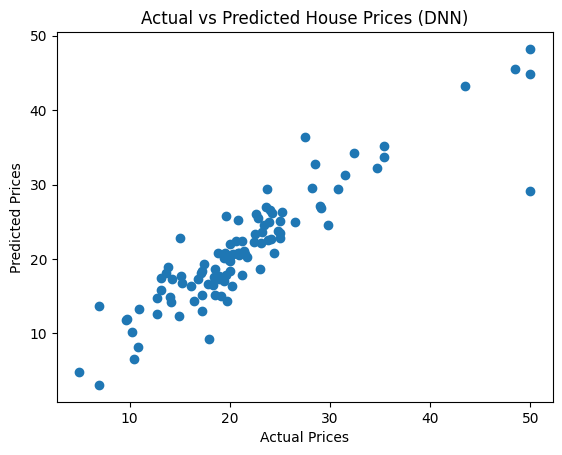

In [14]:
# Optional: You can visualize the actual vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (DNN)")
plt.show()